# NLP Project


In [39]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
import string, re
string.punctuation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
df = pd.read_csv('https://query.data.world/s/koumlilh5zav774mivuajaeahtefko',encoding= 'unicode_escape')
df = df[df.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

# Data Cleaning

In [78]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©']
sw_set = set(stop_words)

In [79]:
def process_article(article):
    article = re.sub(text_cleaning_re, ' ', str(article).lower()).strip()
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [80]:
data = df['tweet_text']
target = df['is_there_an_emotion_directed_at_a_brand_or_product']

In [81]:
processed_data = list(map(process_article, data))

In [82]:
processed_data

[['wesley83',
  '3g',
  'iphone',
  '3',
  'hrs',
  'tweeting',
  'rise',
  'austin',
  'dead',
  'need',
  'upgrade',
  'plugin',
  'stations',
  'sxsw'],
 ['know',
  'fludapp',
  'awesome',
  'ipad',
  'iphone',
  'app',
  'likely',
  'appreciate',
  'design',
  'also',
  'giving',
  'free',
  'ts',
  'sxsw'],
 ['wait', 'ipad', '2', 'also', 'sale', 'sxsw'],
 ['hope', 'year', 'festival', 'crashy', 'year', 'iphone', 'app', 'sxsw'],
 ['great',
  'stuff',
  'fri',
  'sxsw',
  'marissa',
  'mayer',
  'google',
  'tim',
  'reilly',
  'tech',
  'books',
  'conferences',
  'amp',
  'matt',
  'mullenweg',
  'wordpress'],
 ['new',
  'ipad',
  'apps',
  'speechtherapy',
  'communication',
  'showcased',
  'sxsw',
  'conference',
  'iear',
  'edchat',
  'asd'],
 ['nan'],
 ['sxsw',
  'starting',
  'ctia',
  'around',
  'corner',
  'googleio',
  'hop',
  'skip',
  'jump',
  'good',
  'time',
  'android',
  'fan'],
 ['beautifully',
  'smart',
  'simple',
  'idea',
  'rt',
  'madebymany',
  'thenext

In [83]:
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [84]:
lemmatized_output

['wesley83 3g iphone 3 hr tweeting rise austin dead need upgrade plugin station sxsw',
 'know fludapp awesome ipad iphone app likely appreciate design also giving free t sxsw',
 'wait ipad 2 also sale sxsw',
 'hope year festival crashy year iphone app sxsw',
 'great stuff fri sxsw marissa mayer google tim reilly tech book conference amp matt mullenweg wordpress',
 'new ipad apps speechtherapy communication showcased sxsw conference iear edchat asd',
 'nan',
 'sxsw starting ctia around corner googleio hop skip jump good time android fan',
 'beautifully smart simple idea rt madebymany thenextweb wrote hollergram ipad app sxsw',
 'counting day sxsw plus strong canadian dollar mean stock apple gear',
 'excited meet samsungmobileus sxsw show sprint galaxy still running android 2 1 fail',
 'find amp start impromptu party sxsw hurricaneparty wait til android app come',
 'foursquare ups game time sxsw still prefer gowalla far best looking android app date',
 'got ta love sxsw google calendar f

In [85]:
X_lem = lemmatized_output
y_lem = target

In [86]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.40, random_state=1)

In [87]:
sentiments = ['Negative emotion','Positive Emotion','No emotion toward brand or product']

In [88]:
nb_pipeline = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())])
nb_pipeline.fit(X_train_lem, y_train_lem)


from sklearn.metrics import classification_report
y_pred = nb_pipeline.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6483916083916084
                                    precision    recall  f1-score   support

                  Negative emotion       1.00      0.01      0.02       228
                  Positive Emotion       0.64      0.95      0.77      2164
No emotion toward brand or product       0.68      0.21      0.32      1183

                          accuracy                           0.65      3575
                         macro avg       0.78      0.39      0.37      3575
                      weighted avg       0.68      0.65      0.57      3575



In [89]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train_lem, y_train_lem)

y_pred = logreg.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6377622377622377
                                    precision    recall  f1-score   support

                  Negative emotion       0.46      0.35      0.40       228
                  Positive Emotion       0.71      0.73      0.72      2164
No emotion toward brand or product       0.53      0.52      0.52      1183

                          accuracy                           0.64      3575
                         macro avg       0.57      0.53      0.55      3575
                      weighted avg       0.63      0.64      0.63      3575



C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
positive_list = []
negative_list = []
for i in range(len(lemmatized_output)):
    if lemmatized_output[i][1] == "Positive emotion":
        positive_list.extend(lemmatized_output[i][0])
    else:
        negative_list.extend(lemmatized_output[i][0])

In [91]:
positive_list

[]

In [92]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(positive_list)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

NameError: name 'WordCloud' is not defined

In [73]:
X_lem = lemmatized_output
# [' '.join(d) for d in processed_data]

y_lem = target
# X[3]

In [25]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer()

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<7274x7907 sparse matrix of type '<class 'numpy.float64'>'
	with 83485 stored elements in Compressed Sparse Row format>

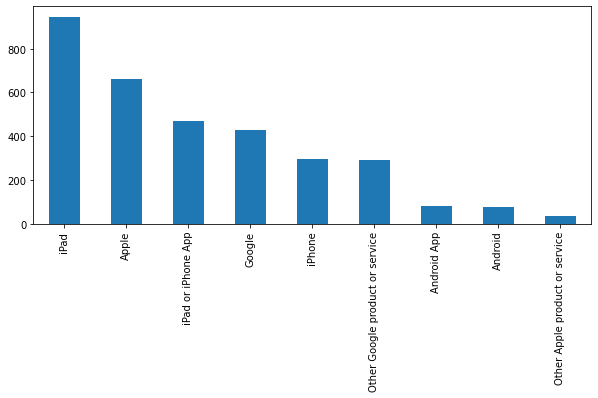

In [45]:
plt.figure(figsize=(10,4))
df['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar');

In [93]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5655
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

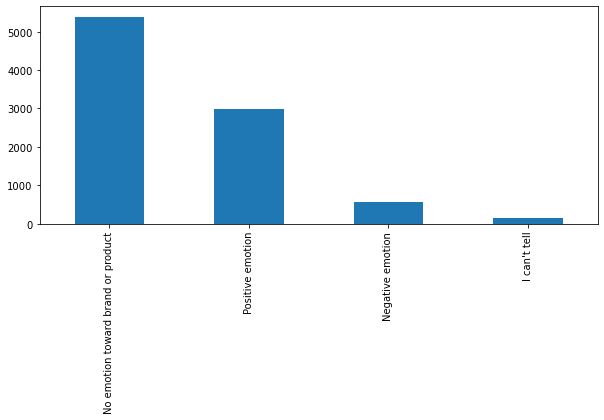

In [46]:
plt.figure(figsize=(10,4))
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar');

In [ ]:
# tweet_types = ('Negative emotion','Positive Emotion','No emotion toward brand or product')
# encoding = OneHotEncoder(handle_unknown='ignore')
# encoding_df = pd.DataFrame(enc.fit_transform(df[['is_there_an_emotion_directed_at_a_brand_or_product']]).toarray())

In [ ]:
# df = df.join(encoding_df)
# df

In [ ]:
# df.rename(columns={0:'Unknown',1:'Negative',2:'No Emotion',3:'Positive'}, inplace=True)

In [ ]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))